In [105]:
title = ['Price', 'Property Type', 'Number of Stars', 'Review Score',
       'Cleanliness', 'Distance to Mall', 'Distance to MRT',
       'Early Check-in (Before 3pm)', 'Late Check-out (After 12pm)',
       'Pay Later', 'Free Cancellation', 'Gym', 'Swimming Pool', 'Car Park',
       'Airport Transfer', 'Breakfast', 'Hygiene+ (Covid-19)',
       '24h Front Desk', 'Laundry Service', 'Bathtub', 'Balcony', 'Kitchen',
       'TV', 'Internet', 'Air Conditioning', 'Ironing', 'Non-Smoking']

In [7]:
import glob
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import random
import xgboost as xgb


dfs = glob.glob("*Novhotels.csv")

# for df in dfs:
train_features = pd.read_csv("10Novhotels.csv")

#Preliminary data cleaning
col_names = train_features.columns
list1 = []
for i in col_names:
    prop_na = sum(train_features.loc[:,i].isnull())/train_features.loc[:,"Laundry Service"].count()
    if prop_na >= .9:
        list1.append(i)

title = ['Price', 'Property Type', 'Number of Stars', 'Review Score',
       'Cleanliness', 'Distance to Mall', 'Distance to MRT',
       'Early Check-in (Before 3pm)', 'Late Check-out (After 12pm)',
       'Pay Later', 'Free Cancellation', 'Gym', 'Swimming Pool', 'Car Park',
       'Airport Transfer', 'Breakfast', 'Hygiene+ (Covid-19)',
       '24h Front Desk', 'Laundry Service', 'Bathtub', 'Balcony', 'Kitchen',
       'TV', 'Internet', 'Air Conditioning', 'Ironing', 'Non-Smoking']

train_features = train_features.drop(columns = list1)
train_features = train_features.drop(['Unnamed: 0', 'Name'], axis = 1) 
#train_features.rename(columns={'*Nov': 'Price'}, inplace=True)
train_features.columns = title

pd.options.display.max_columns = None
pd.options.display.max_rows = None
# display(train_features.head())

train_features = train_features.replace(['Y', 'N'], [1, 0])
train_features = train_features[train_features["Price"].notna()]

train_features["Price"] = train_features["Price"].astype(str).str.replace(',','')
#     train_features["Price"] = train_features["Price"].str.replace(',','')
train_features["Price"] = pd.to_numeric(train_features["Price"])

#Change stars to categorical
train_features["Number of Stars"] = train_features["Number of Stars"].astype(str)


#One hot encoding
train_features = pd.get_dummies(train_features)

#Check for missing data
#     check = train_features.isnull().sum()

mean_val_distmall = round(train_features['Distance to Mall'].mean(),0)
train_features['Distance to Mall']=train_features['Distance to Mall'].fillna(mean_val_distmall)
mean_val_distmrt = round(train_features['Distance to MRT'].mean(),0)
train_features['Distance to MRT']=train_features['Distance to MRT'].fillna(mean_val_distmrt)
mean_val_price = round(train_features['Price'].mean(),0)
train_features['Price']=train_features['Price'].fillna(mean_val_price)

#     print(train_features.isnull().sum())

# Create correlation matrix
corr_matrix = train_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
train_features.drop(to_drop, axis=1, inplace=True)

labels = []

for i in train_features.columns:
    labels.append(i)
labels.remove('Price')

training_features = labels 
target = 'Price'

random.seed(5)
#Perform train-test split
#creating 90% training data and 10% test data
X_train, X_test, Y_train, Y_test = train_test_split(train_features[training_features], train_features[target], train_size = 0.9)

colsample = np.arange(0.0, 1.1, 0.1)
learningrate = np.arange(0.0, 1.1, 0.1)
maxdepth = list(range(1, 1000))
alpha_val = list(range(1, 1000))
n_estimators_val = list(range(1, 1000))

# for a in range(len(maxdepth)):
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 1, n_estimators = 20)

xg_reg.fit(X_train,Y_train)

predicted = xg_reg.predict(X_test)
# print(n_estimators_val[a])
#the mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, predicted))

#explained variance score: 1 is perfect prediction
print('R square score: %.2f' % r2_score(Y_test,predicted))


df = pd.read_csv("prices_1adult.csv")
df = df.replace(to_replace ="[]", value =np.nan) 
df = pd.melt(df, id_vars='Unnamed: 0')
df.columns = ["Name","Date","Price"]
df.head()

df_second = pd.read_csv("Predicted_Price.csv")
df_second.head()
df_second = df_second.drop_duplicates()

df_merge_col = pd.merge(df, df_second, on=['Name','Date'])
# df_merge_col.to_csv("Predicted_Price.csv")


NameError: name 'title' is not defined

In [8]:
train_features.columns

Index(['10Nov', 'Property Type', 'Number of Stars', 'Review Score',
       'Cleanliness', 'Distance to Mall', 'Distance to MRT',
       'Early Check-in (Before 3pm)', 'Late Check-out (After 12pm)',
       'Pay Later', 'Free Cancellation', 'Gym', 'Swimming Pool', 'Car Park',
       'Airport Transfer', 'Breakfast', 'Hygiene+ (Covid-19)',
       '24h Front Desk', 'Laundry Service', 'Bathtub', 'Balcony', 'Kitchen',
       'TV', 'Internet', 'Air Conditioning', 'Ironing', 'Non-Smoking'],
      dtype='object')

In [9]:
dfs = glob.glob("*Novhotels.csv")

df_from_each_file = (pd.read_csv(f) for f in dfs)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
name_list = concatenated_df['Name'].tolist()
actualprice_list = concatenated_df["*Nov"].tolist()

KeyError: '*Nov'

In [22]:
df = pd.read_csv("prices_1adult.csv")
df = df.replace(to_replace ="[]", value =np.nan) 
df = pd.melt(df, id_vars='Unnamed: 0')
df.columns = ["Name","Date","Price"]
df.head()

,Name,Date,Price
0,5footway.inn Project Chinatown,1/11/2020,22
1,AMOY by Far East Hospitality (SG Clean Certified),1/11/2020,231
2,Adler Hostel,1/11/2020,NaN
3,"Aerotel Transit Hotel, Terminal 1",1/11/2020,NaN
4,Aliwal Park Hotel,1/11/2020,67


In [25]:
df_second = pd.read_csv("Predicted_Price.csv")
df_second.head()

,Unnamed: 0,Name,Date,Price,Review Score,Cleanliness,Distance to Mall,Distance to MRT,Early Check-in (Before 3pm),Late Check-out (After 12pm),...,Property Type_Resort,Property Type_Resort villa,Property Type_Serviced apartment,Number of Stars_0,Number of Stars_1,Number of Stars_2,Number of Stars_3,Number of Stars_4,Number of Stars_5,Predicted_price
0,0,5footway.inn Project Chinatown,1/11/2020,22,7.7,7.2,830.0,150.0,0,0,...,0,0,0,0,0,1,0,0,0,31.17698
1,1,5footway.inn Project Chinatown,2/11/2020,27,7.7,7.2,830.0,150.0,0,0,...,0,0,0,0,0,1,0,0,0,31.17698
2,2,5footway.inn Project Chinatown,3/11/2020,27,7.7,7.2,830.0,150.0,0,0,...,0,0,0,0,0,1,0,0,0,31.17698
3,3,5footway.inn Project Chinatown,4/11/2020,27,7.7,7.2,830.0,150.0,0,0,...,0,0,0,0,0,1,0,0,0,31.17698
4,4,5footway.inn Project Chinatown,5/11/2020,22,7.7,7.2,830.0,150.0,0,0,...,0,0,0,0,0,1,0,0,0,31.17698


In [26]:
df_second = df_second.drop_duplicates()

In [30]:
df_merge_col = pd.merge(df, df_second, on=['Name','Date'])
# df_merge_col.to_csv("Predicted_Price.csv")

In [37]:
df_merge_col = df_merge_col.drop_duplicates()
df_merge_col = df_merge_col.rename(columns={'Price_x': 'Price'})
df_merge_col = df_merge_col.drop(columns=['Price_y'])
df_merge_col.head()

,Name,Date,Price,Unnamed: 0,Review Score,Cleanliness,Distance to Mall,Distance to MRT,Early Check-in (Before 3pm),Late Check-out (After 12pm),...,Property Type_Resort,Property Type_Resort villa,Property Type_Serviced apartment,Number of Stars_0,Number of Stars_1,Number of Stars_2,Number of Stars_3,Number of Stars_4,Number of Stars_5,Predicted_price
0,5footway.inn Project Chinatown,1/11/2020,22,0,7.7,7.2,830.0,150.0,0,0,...,0,0,0,0,0,1,0,0,0,31.17698
1,AMOY by Far East Hospitality (SG Clean Certified),1/11/2020,231,30,0.0,9.1,880.0,110.0,0,0,...,0,0,0,0,0,0,0,1,0,135.46799
2,Adler Hostel,1/11/2020,NaN,60,8.6,8.4,940.0,320.0,0,0,...,0,0,0,0,0,1,0,0,0,73.67931
3,"Aerotel Transit Hotel, Terminal 1",1/11/2020,NaN,90,8.2,8.8,240.0,560.0,1,0,...,0,0,0,1,0,0,0,0,0,202.42873
4,Aliwal Park Hotel,1/11/2020,67,120,6.2,5.6,2100.0,520.0,0,0,...,0,0,0,0,0,1,0,0,0,56.30775


C:\Users\valen\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\valen\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


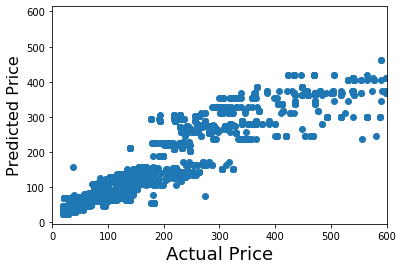

In [38]:
import numpy as np
import matplotlib.pyplot as plt

df_plot = df_merge_col.dropna()

df_plot["Price"] = df_plot["Price"].astype(str).str.replace(',','')
df_plot["Price"] = pd.to_numeric(df_plot["Price"])

plt.scatter(df_plot["Price"], df_plot["Predicted_price"])
plt.xlim(0, 600)
plt.xlabel('Actual Price', fontsize=18)
plt.ylabel('Predicted Price', fontsize=16)
plt.show()

In [39]:
type(df_plot["Price"][0])

numpy.int64

In [12]:
df_second = train_features
#df_second = df_second.drop(columns=["Predicted_price"])
#final_df = df.merge(df_second, on='Name', how='left')
#final_df.to_csv("Final_df.csv")

In [13]:

#concatenated_df.head()
concatenated_df.filter(regex=("Nov"),axis=1)
#concatenated_df.select(lambda col: col.endswith('Nov'), axis=1)


,10Nov,11Nov,12Nov,13Nov,14Nov,15Nov,16Nov,17Nov,18Nov,19Nov,...,29Nov,2Nov,30Nov,3Nov,4Nov,5Nov,6Nov,7Nov,8Nov,9Nov
0,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
dfs = glob.glob("*Novhotels.csv")

# for df in dfs:
#     train_features = pd.read_csv(df)
train_features = concatenated_df

#Preliminary data cleaning
col_names = train_features.columns
list1 = []
for i in col_names:
    prop_na = sum(train_features.loc[:,i].isnull())/train_features.loc[:,"Laundry Service"].count()
    if prop_na >= .9:
        list1.append(i)

train_features = train_features.drop(columns = list1)
train_features = train_features.drop(['Unnamed: 0', 'Name'], axis = 1) 
#train_features.rename(columns={'*Nov': 'Price'}, inplace=True)
print(len(train_features.columns))
train_features.columns = title[1:]

pd.options.display.max_columns = None
pd.options.display.max_rows = None
# display(train_features.head())

train_features = train_features.replace(['Y', 'N'], [1, 0])

#Change stars to categorical
train_features["Number of Stars"] = train_features["Number of Stars"].astype(str)


#One hot encoding
train_features = pd.get_dummies(train_features)

mean_val_distmall = round(train_features['Distance to Mall'].mean(),0)
train_features['Distance to Mall']=train_features['Distance to Mall'].fillna(mean_val_distmall)
mean_val_distmrt = round(train_features['Distance to MRT'].mean(),0)
train_features['Distance to MRT']=train_features['Distance to MRT'].fillna(mean_val_distmrt)

# Create correlation matrix
corr_matrix = train_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
train_features.drop(to_drop, axis=1, inplace=True)

predicted = xg_reg.predict(train_features)
train_features['Predicted_price'] = predicted
train_features['Name'] = name_list
train_features.to_csv('Predicted price.csv')
#     print(train_features.columns)


26
